In [9]:
from pandas_datareader import data
import pandas as pd
import matplotlib.pyplot as plt
import pymc3 as pm

In [3]:
returns = data.get_data_yahoo('SPY', start='2008-5-1', end='2009-12-1')['Close'].pct_change()

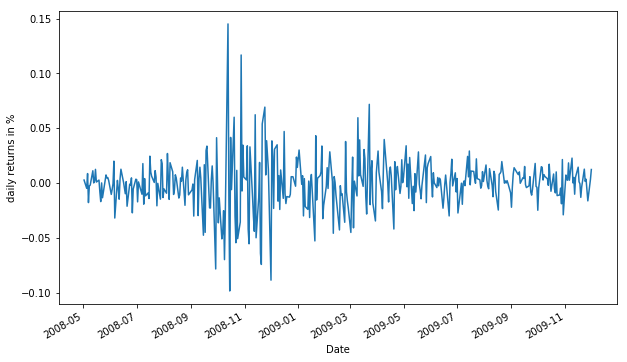

In [8]:
returns.plot(figsize=(10, 6))
plt.ylabel('daily returns in %');

In [10]:
# Specifying the model

with pm.Model() as sp500_model:
    nu = pm.Exponential('nu',0.1,testval=5.0)
    sigma = pm.Exponential('sigma',1/0.02,testval=0.1)
    
    s = pm.GaussianRandomWalk('s',sd=sigma, shape=len(returns))
    volatility_process = pm.Deterministic('volatility_process', pm.math.exp(-2*s)**0.5)
    r = pm.StudentT('r',nu=nu,sd=volatility_process, observed = returns)

In [11]:
# Fitting the model

with sp500_model:
    trace = pm.sample(500)
    

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [r_missing, s, sigma, nu]
Sampling 4 chains: 100%|██████████| 4000/4000 [00:44<00:00, 89.96draws/s] 
The acceptance probability does not match the target. It is 0.7074348751188262, but should be close to 0.8. Try to increase the number of tuning steps.
The estimated number of effective samples is smaller than 200 for some parameters.


,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
s__0,4.73,0.24,0.01,4.26,5.19,1573.11,1.0
s__1,4.74,0.23,0.01,4.29,5.17,1604.90,1.0
s__2,4.73,0.22,0.01,4.31,5.15,1555.44,1.0
s__3,4.72,0.21,0.01,4.30,5.12,1817.13,1.0
s__4,4.72,0.21,0.00,4.30,5.10,1837.23,1.0
s__5,4.72,0.20,0.01,4.33,5.10,1783.89,1.0
s__6,4.72,0.20,0.01,4.36,5.12,1562.12,1.0
s__7,4.72,0.19,0.00,4.34,5.08,1565.18,1.0
s__8,4.72,0.19,0.01,4.37,5.09,1446.03,1.0
s__9,4.72,0.18,0.01,4.39,5.12,1417.62,1.0


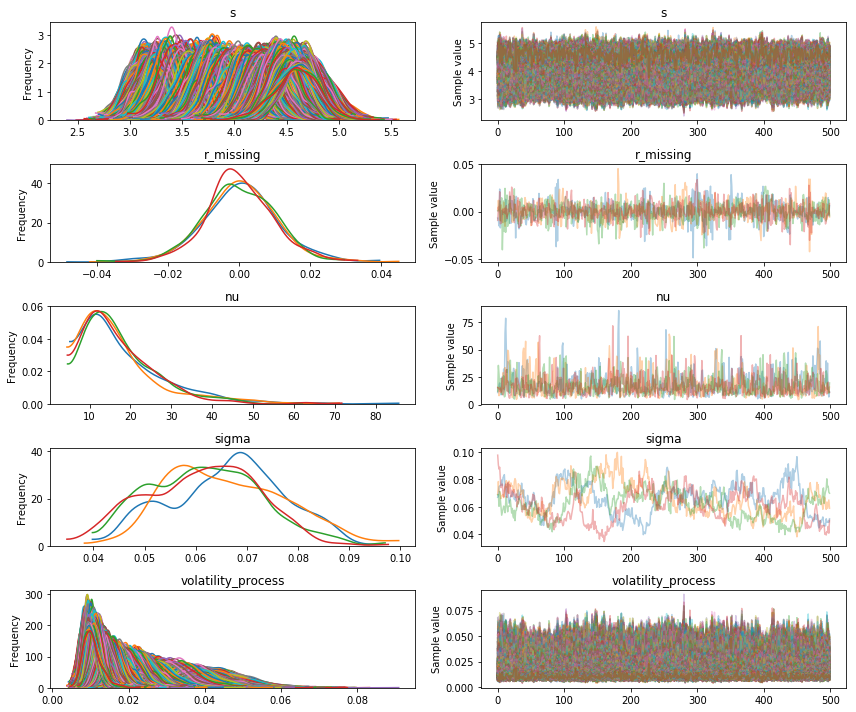

In [12]:
# Posterior analysis

pm.traceplot(trace);
pm.summary(trace).round(2)